## Who will leave and who will stay?

For the Big Data companies, it’s important to know which of current employees are planning to leave the company and the reason behind it so that they can take corresponding actions.
Sometimes, the companies also give training to the candidates who signup. But out of those, not all the candidates really want to work for the company after training. They start looking for a new employment instead.
If the company can do some analysis to categorize the candidates, it would help to reduce the cost and time as well as the quality of training or planning the course.

In this project, I will try to do the analyses for the above mentioned problem. I will use a dataset from Kaggle which contains information related to demographics, education, experience on hand from registered and enrolled candidates, and try to understand the factors that lead a person to leave current job.

This is a classification problem and I will be using various classification ML models.

__What benefit can this project bring?__

It will help to prevent the loss of precious human resources, feedback of the company's current working environment and give guidance in the future recruitment process.

__Loading data__

In Kaggle, the data is split up between 'train.csv' and 'test.csv'. All the data available for training therefore will be located in 'train.csv', this dataset has the predictor variables and the response variable. The 'test.csv' on the other hand is made for submissions and is only used for validating the final model and is unlabeled. 
In this project, I will be using only the 'train.csv' and load it under the name `data`.

__Outline of the notebook__

1. Loading and Cleaning the Data
- importing libraries
- reading the first and last five rows of the dataset
- defining the features
- dealing with the dtypes 
- dealing with the missing values
- summary statistics

2. Exploratory Data Analysis
- importing the libraries
- bar graphs for distribution of the categorical features
- bar graphs for distribution of unique values of the categorical features on the basis of target
- Kde plots for distribution of Numerical features with respect to the target
- label encoding
- Heatmap for correlation of Numerical features with target
- some more EDA

3. Modelling
- importing libraries
- Train - Test split
- Standardizing
- Upsampling using SMOTE
- Logistic Regression
- Random Forest Classifier
- KNN
- SVM
- Model Result Graphs using Tableau

4. Conclusion and Next Steps


### 1. Loading and Cleaning the Data

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Here I will load the train data and name it 'data' and investigate the first five rows of the train set.
data = pd.read_csv(r"C:\Users\amanp\OneDrive\Desktop\aug_train.csv")

In [5]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


__The data has the following features:__

enrollee_id : Unique ID for enrollee

city: City code

citydevelopmentindex: Developement index of the city (scaled)

gender: Gender of enrolee

relevent_experience: Relevent experience of enrolee

enrolled_university: Type of University course enrolled if any

education_level: Education level of enrolee

major_discipline :Education major discipline of enrolee

experience: Enrolee total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [7]:
data.shape

(19158, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

I will need to fix some of the column's dtypes from object to numerical. 
The categorical columns are - city, gender, relevent_experience, enrolled_university, education_level, major_discipline, company_size and company_type.

The numerical columns should be-  city_development_index, experience, last_new_job, training_hours and target.

So, I need to change the dtype of experience and last_new_job from categorical to numerical. But before that, I need to fix some values in the 'experience' and  'last_new_job' columns as well as check fill the missing values.

In [9]:
# I see that there are some values in the 'experience' column which can be changed into integers. 
data['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [10]:
# I will replace the value '>20' with 21 and values '<1' with 0.
def replace(experience):
    if experience == '>20':
        return 21
    elif experience == '<1':
        return 0

    else:
        return experience

In [11]:
data.experience = data.experience.map(replace)

In [12]:
# Let's confirm if the changes happened.
data['experience'].unique()

array([21, '15', '5', 0, '11', '13', '7', '17', '2', '16', '1', '4', '10',
       '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [13]:
data['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [14]:
# let's do the same in case of some values in the column 'last_new_job', replacing '>4' with 5 and 'never' with o.
def replace(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0

    else:
        return last_new_job

data.last_new_job = data.last_new_job.map(replace)
data['last_new_job'].unique()

array(['1', 5, 0, '4', '3', '2', nan], dtype=object)

__Checking for missing values__

In [15]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

There are missing values in some of the columns. I decided to fill the categorical values with mode and numerical values with median.

In [16]:
# here I will define funtions to fill categorical missing values with mode and numerical missing values with median.
def fill_with_mode(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in data.select_dtypes(include='object').columns:
    fill_with_mode(data,i)


In [17]:
def fill_with_median(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in data.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(data,i)

In [18]:
# Let's confirm if the functions worked properly and we now have no missing values left.
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [19]:
# Now I will change the dtypes of 'experience' and 'last_new_job' from categorical to numerical.
data['experience'] = data['experience'].astype(int)

data['last_new_job'] = data['last_new_job'].astype(int)

In [20]:
data.to_csv(r'data_cleaned.csv')

Now our data is clean and ready for EDA.

__Summary Statistics__

In [21]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,36,1.0
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0.0
3,3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,52,1.0
4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


In [22]:
data.drop(columns = 'Unnamed: 0', inplace = True)
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


In [23]:
data.describe(include = 'all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,19158,19158,19158,19158,19158,19158.000000,19158,19158,19158.000000,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,NaN,8,6,NaN,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,50-99,Pvt Ltd,NaN,NaN,NaN
freq,NaN,4355,NaN,17729,13792,14203,12058,17305,NaN,9021,15957,NaN,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,10.137123,NaN,NaN,1.978338,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,6.795143,NaN,NaN,1.663502,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,1.000000,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,1.000000,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,3.000000,88.000000,0.000000


### 2. Exploratory Data Analysis

In [24]:
#libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

__Distribution of the categorical features.__

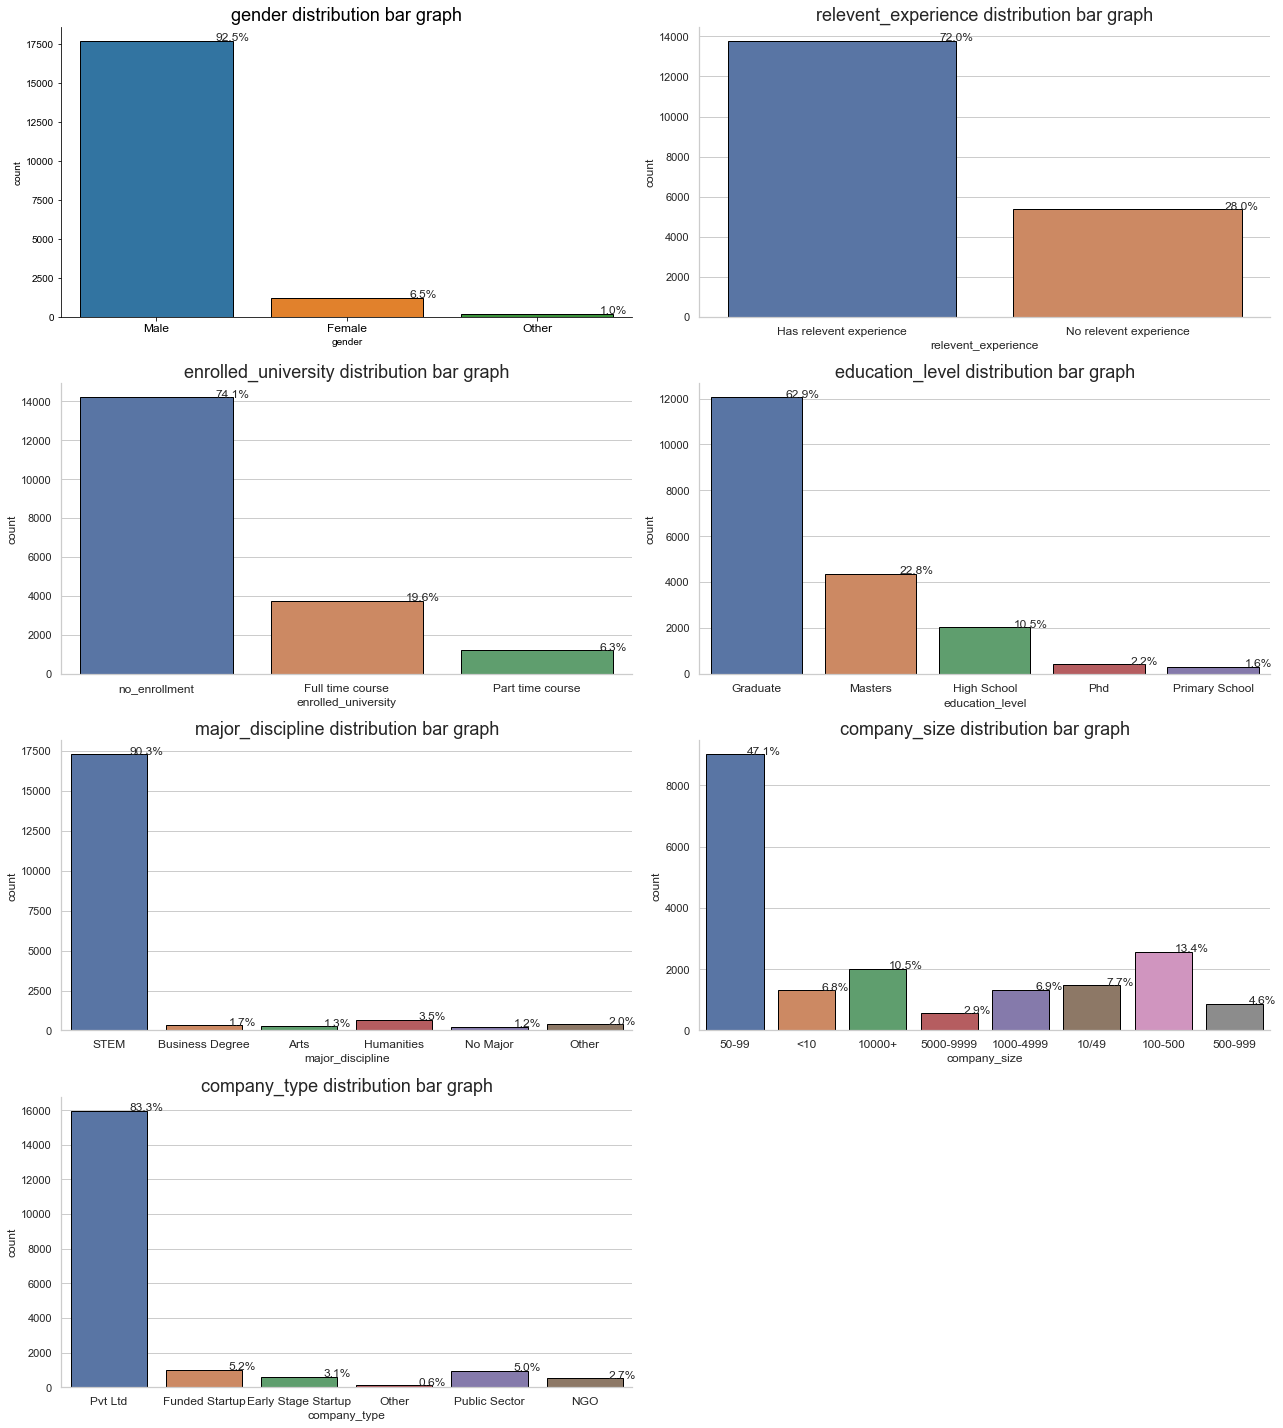

In [25]:

plt.figure(figsize=[18,20])
variables= ['gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'company_size', 'company_type']
total = float(len(data))
n=1
for v in variables:
    plt.subplot(4,2,n)
    ax=sns.countplot(x = v, data = data, edgecolor='black')
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.3)
    plt.title('{} distribution bar graph'.format(v), fontsize=18)
    plt.xticks(fontsize=12)
    plt.subplots_adjust(wspace=0.3)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    n=n+1
    plt.tight_layout()
    sns.despine()

plt.show()

__Observations from the visualizations:__

- Majority of the candidates signing up for the training are males(around 92%).
- Around 72% of the candidates have experience in the field of Data Science.
- Only 20% of the candidate sdid the full time university course related to the field of Data Science while around 74% of the candidates did not enroll in university.
- The number of graduates were much more(63%) followed by candidates with masters degree(23%). A few PhD people also applied.
- Undoubtedly, most of the candidates are from STEM background(90%). From the other backgrounds, candidates with the background of Humanities(3.5%) exceed in number than the others. 
- The data from companies of various sizes is collected in the given dataset, but most comman company size is 50 to 99 people(47%) followed by a little bigger company with number of employees from 100 to 500.
- Lasty, majority of the company types are Private Limited.

__Distribution of unique values of the categorical features on the basis of target:__

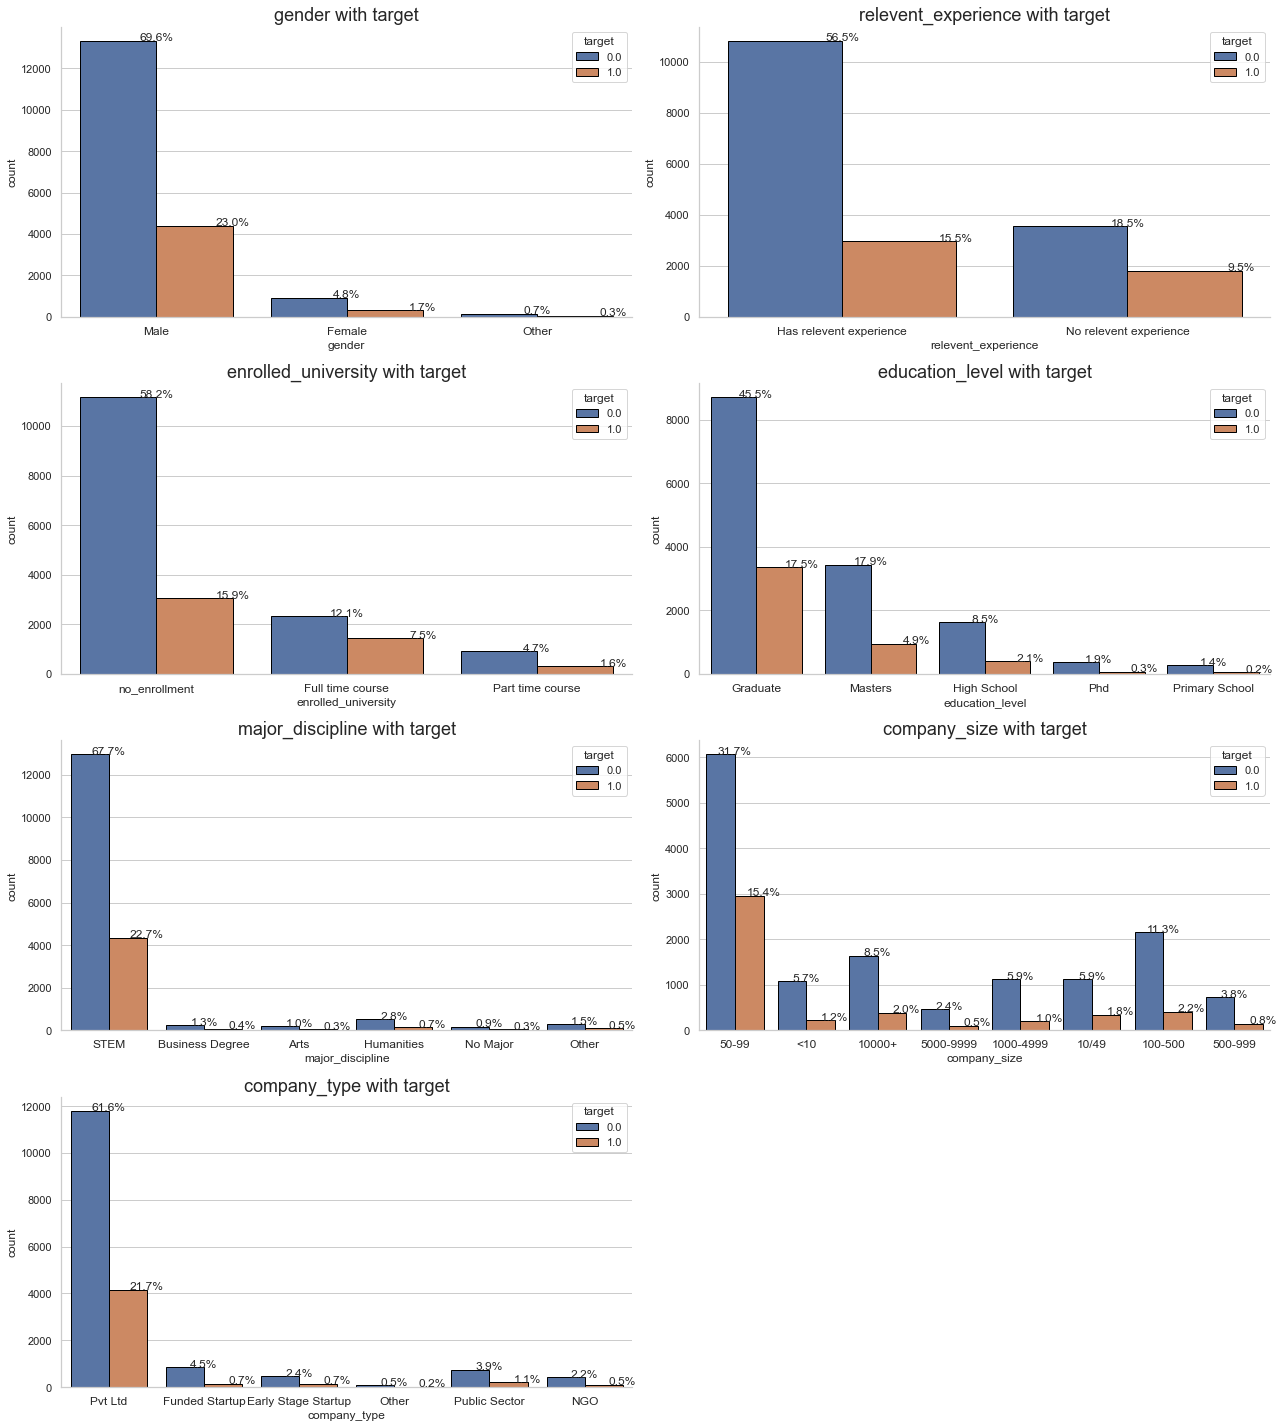

In [26]:
plt.figure(figsize=[18,20])
variables= ['gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'company_size', 'company_type']
total = float(len(data))
n=1
for v in variables:
    plt.subplot(4,2,n)
    ax=sns.countplot(x = v, data = data ,hue='target', edgecolor='black')
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.3)
    plt.title('{} with target'.format(v), fontsize = 18)
    plt.xticks(fontsize=12)
    plt.subplots_adjust(wspace=0.3)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    n=n+1
    plt.tight_layout()
    sns.despine()

plt.show()

__Observations from these visualizations:__

- With respect to every feature, the ratio of the candidates not looking for a job change is much more than those who are interested in changing their job after the courses and training.

- So we cannot say much about any one of the features leading to job change. 






__Distribution of Numerical columns with respect to the target:__

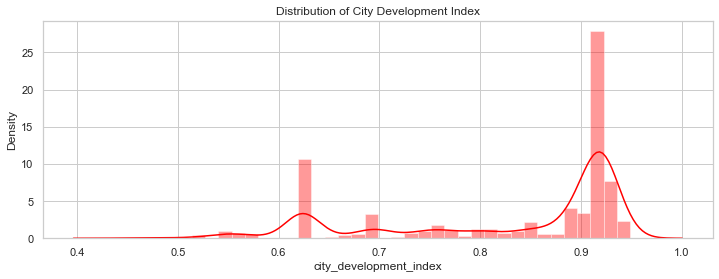

In [27]:
plt.figure(figsize=[12,4])
sns.distplot(data['city_development_index'], color='red')
plt.title('Distribution of City Development Index')
plt.show()

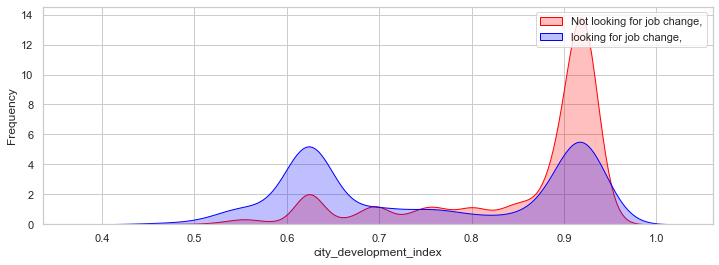

In [28]:
plt.figure(figsize=[12,4])
g = sns.kdeplot(data['city_development_index'][(data["target"] == 0) & (data['city_development_index'].notnull())], color="Red", shade = True)
g = sns.kdeplot(data['city_development_index'][(data["target"] == 1) & (data['city_development_index'].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel('city_development_index')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

__Observations:__
- There are more number of candidates who change their jobs than those who do not from the cities with CDI around 0.6.
- Most of the candidates from the cities with CDI around 0.9 remain in their current jobs and only few of them change their jobs.


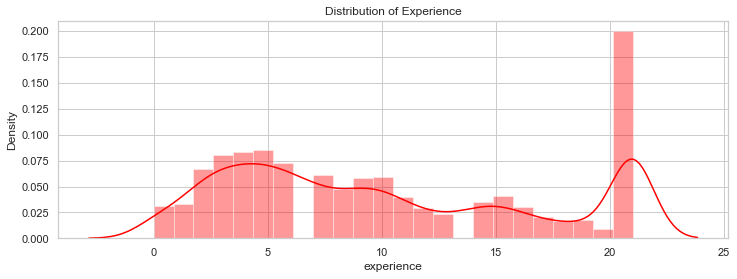

In [29]:
plt.figure(figsize=[12,4])
sns.distplot(data['experience'], color='red')
plt.title('Distribution of Experience')
plt.show()

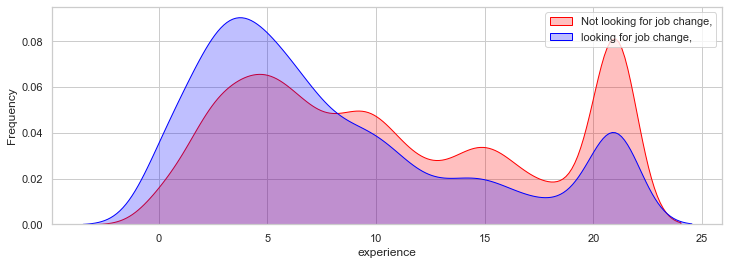

In [30]:
plt.figure(figsize=[12,4])
g = sns.kdeplot(data['experience'][(data["target"] == 0) & (data['experience'].notnull())], color="Red", shade = True)
g = sns.kdeplot(data['experience'][(data["target"] == 1) & (data['experience'].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel('experience')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

__Observations:__
- Candidates having experience of 0 to 8 years have more probability of leaving their current job whereas those with experience greater than 20 years are more likely to stay in their current job. 


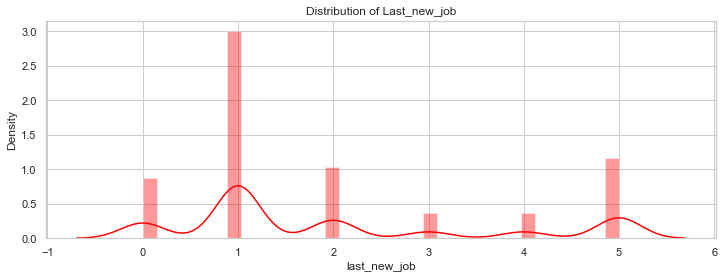

In [31]:
plt.figure(figsize=[12,4])
sns.distplot(data['last_new_job'], color='red')
plt.title('Distribution of Last_new_job')
plt.show()

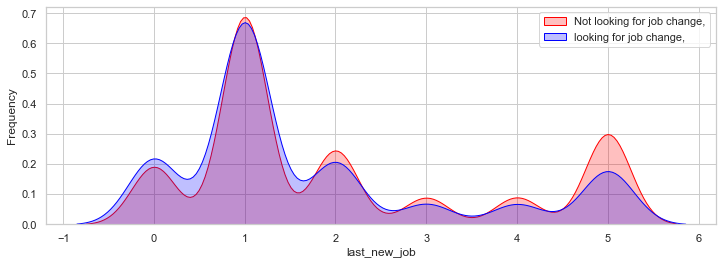

In [32]:
plt.figure(figsize=[12,4])
g = sns.kdeplot(data['last_new_job'][(data["target"] == 0) & (data['last_new_job'].notnull())], color="Red", shade = True)
g = sns.kdeplot(data['last_new_job'][(data["target"] == 1) & (data['last_new_job'].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel('last_new_job')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

__Observations:__

-  There are almost similar number of candidates eith both the cases except for those who were in their last job for five years, they are mostly going to remain in the company after the training and courses.  


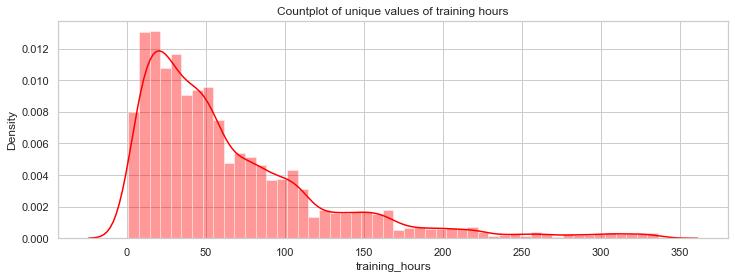

In [33]:
plt.figure(figsize=[12,4])
sns.distplot(data['training_hours'], color='red')
plt.title('Countplot of unique values of training hours')
plt.show()

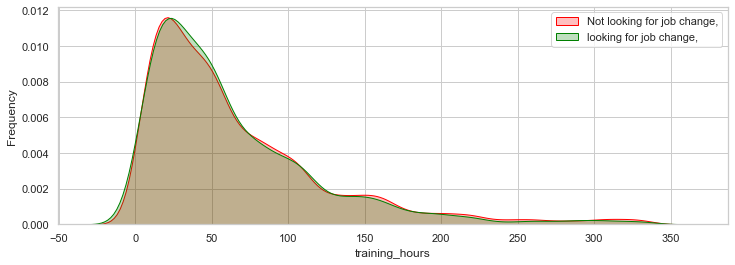

In [34]:
plt.figure(figsize=[12,4])
g = sns.kdeplot(data['training_hours'][(data["target"] == 0) & (data['training_hours'].notnull())], color="Red", shade = True)
g = sns.kdeplot(data['training_hours'][(data["target"] == 1) & (data['training_hours'].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel('training_hours')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])


__Observations:__
- The plots almost overlap completely.

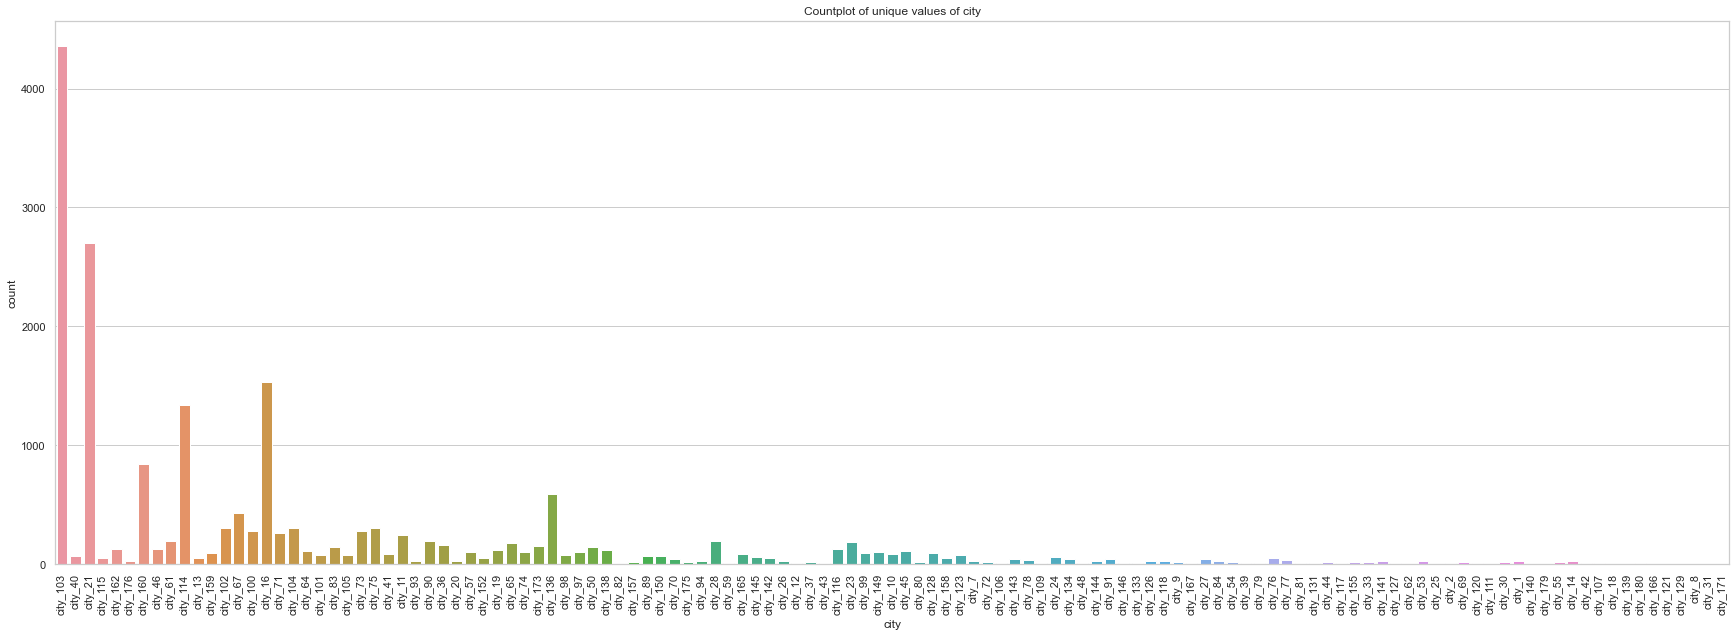

In [35]:
plt.figure(figsize=[30,10])
sns.countplot(x='city', data=data)
plt.title('Countplot of unique values of city')
plt.xticks(rotation=90)
plt.show()

__Now I will encode our categorical features using Label Encoder__

In [36]:
# Making Dictionaries of ordinal features

gender_map = {
        'Female': 2,
        'Male': 1,
        'Other': 0
         }

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}
    
education_level_map = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 
    
major_map ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}
    
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

company_size_map = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
# Transforming Categorical features into numerical features

data.loc[:,'education_level'] = data['education_level'].map(education_level_map)
data.loc[:,'company_size'] = data['company_size'].map(company_size_map)
data.loc[:,'company_type'] = data['company_type'].map(company_type_map)
#data.loc[:,'last_new_job'] = data['last_new_job'].map(last_new_job_map)
data.loc[:,'major_discipline'] = data['major_discipline'].map(major_map)
data.loc[:,'enrolled_university'] = data['enrolled_university'].map(enrolled_university_map)
data.loc[:,'relevent_experience'] = data['relevent_experience'].map(relevent_experience_map)
data.loc[:,'gender'] = data['gender'].map(gender_map)
#data.loc[:,'experience'] = data['experience'].map(experience_map)

#encoding city feature using label encoder
lb_en = LabelEncoder()

data.loc[:,'city'] = lb_en.fit_transform(data.loc[:,'city']) 
data.drop(['enrollee_id'], axis=1, inplace=True)

In [39]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,0.920,1,1,0,2,0,21,5,0,1,36,1.0
1,77,0.776,1,0,0,2,0,15,5,0,5,47,0.0
2,64,0.624,1,0,1,2,0,5,5,0,0,83,0.0
3,14,0.789,1,0,0,2,1,0,5,0,0,52,1.0
4,50,0.767,1,1,0,3,0,21,5,1,4,8,0.0


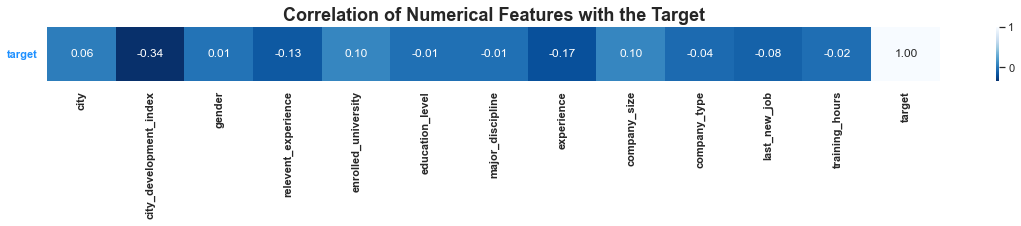

In [40]:
plt.figure(figsize=(20,1))
sns.heatmap(data.corr().sort_values(by = ['target'], ascending = False).head(1), cmap='Blues_r', annot=True, annot_kws={'size': 12}, fmt = '.2f')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

__Some more EDA__

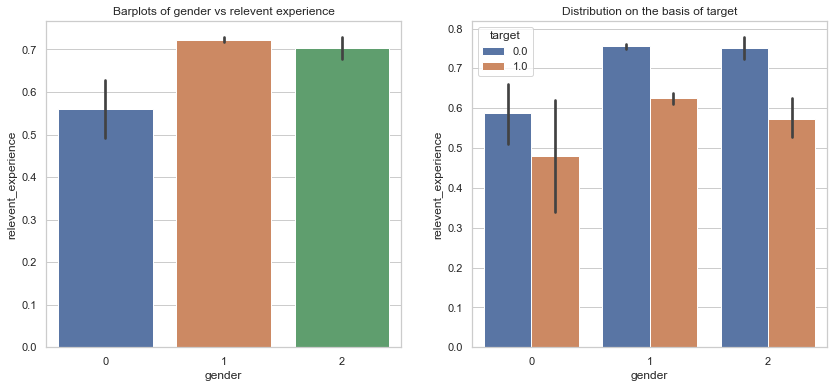

In [41]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=data, x='gender', y='relevent_experience')
plt.title('Barplots of gender vs relevent experience')
plt.subplot(1,2,2)
sns.barplot(data=data, x='gender', y='relevent_experience', hue='target')
plt.title('Distribution on the basis of target')

plt.show()

Here 0: others, 1: males, 2: females
__Observations:__
- Males have slightly more experience than the females and other candidates.
- For all the cases, the percentage of candidates who do not change their job are more than those who change their jobs. This difference is less in case of male candidates.

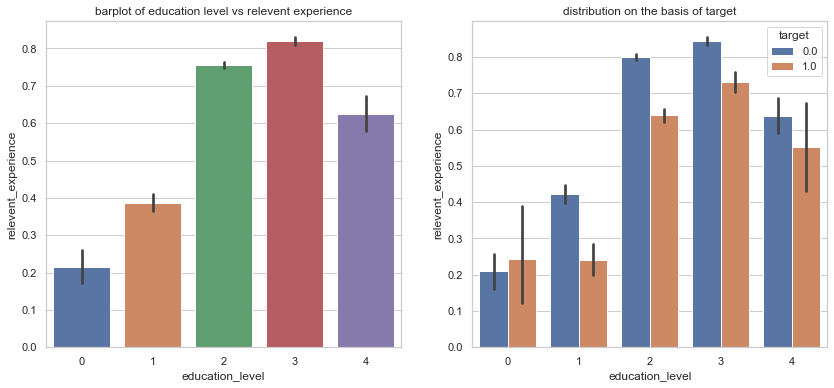

In [42]:
total = float(len(data))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=data, x='education_level', y='relevent_experience')
plt.title('barplot of education level vs relevent experience')
plt.subplot(1,2,2)
sns.barplot(data=data, x='education_level', y='relevent_experience', hue='target')
plt.title('distribution on the basis of target')

plt.show()

here 0:primary school, 1: high school, 2: graduate, 3: masters, 4: phd
__Observations:__
- Candidates with masters degree have relevent experience more than the others, followed by graduates. 
- In all the cases, the number of candidates who do not change their jobs are more than the other way round, except fot the candidates with only primary school education.

### 3. Modelling

In [43]:
# For Data split
from sklearn.model_selection import train_test_split

# For Model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# For Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# For Standardizing
from sklearn.preprocessing import StandardScaler

In [44]:
col_length = len(data.columns)

#Y is the target column, X has the rest
X = data.iloc[:, 0:col_length-1]
y = data.iloc[:, col_length-1:col_length]

In [45]:
# Double check X
X

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5,0.920,1,1,0,2,0,21,5,0,1,36
1,77,0.776,1,0,0,2,0,15,5,0,5,47
2,64,0.624,1,0,1,2,0,5,5,0,0,83
3,14,0.789,1,0,0,2,1,0,5,0,0,52
4,50,0.767,1,1,0,3,0,21,5,1,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55,0.878,1,0,0,2,3,14,5,0,1,42
19154,5,0.920,1,1,0,2,0,14,5,0,4,52
19155,5,0.920,1,1,0,2,0,21,5,0,4,44
19156,94,0.802,1,1,0,1,0,0,6,0,2,97


In [46]:
# double check y
y


,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
19153,1.0
19154,1.0
19155,0.0
19156,0.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int32  
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  int64  
 3   relevent_experience     19158 non-null  int64  
 4   enrolled_university     19158 non-null  int64  
 5   education_level         19158 non-null  int64  
 6   major_discipline        19158 non-null  int64  
 7   experience              19158 non-null  int64  
 8   company_size            19158 non-null  int64  
 9   company_type            19158 non-null  int64  
 10  last_new_job            19158 non-null  int64  
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 1.8 MB


__Comparing labels of target variables__

The next step is to check if there is an imbalance is the response variables. If there is a significant difference in the number of observations for each type class, the learning algorithm will exhibit markedly poor performance.

In [48]:
data.groupby('target').size()

target
0.0    14381
1.0     4777
dtype: int64

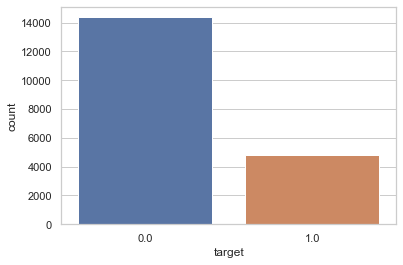

In [49]:
sns.countplot(x='target', data=data)
plt.show()

There is big class imbalance in the target. To address this, I will use SMOTE to create synthetic data in the minority class.

SMOTE in imblearn package will add synthetic data on top of original minority data. This is nice as it ensures all my original data is included for modelling.

I will be using four different models (Log Reg, KNN, RF, SVM). I will present base models with regular imbalance data and with upsampled data using SMOTE to showcase the effect of upsampling.

In [50]:
# Perform train_test_split with stratify on y as it is imbalanced and make sure train and validation gets same portion of 0, 1 in y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, stratify= y, test_size=0.2)

In [51]:
ScalerX = StandardScaler()
X_train = ScalerX.fit_transform(X_train)
X_test = ScalerX.transform(X_test)

In [52]:
# Import SMOTE package to address the imbalance on target y
from imblearn.over_sampling import SMOTE

In [53]:
# In order to have same number of target class, I put 1 in sampling_strategy parameter
smote = SMOTE(sampling_strategy = 1, random_state = 777, n_jobs = -1)

X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [54]:
# Check the number of classes in target 
len(y_train_smote[y_train_smote == 0]), len(y_train_smote[y_train_smote == 1])

(23008, 23008)

In [55]:
# Original size of y_train in class 1
len(y_train[y_train == 1])

15326

In [56]:
# Compare number of data in original vs upsampled
X_train.shape[0], X_train_smote.shape[0]

(15326, 23008)

SMOTE created 7682 synthetic data in class 1 to match the size of data in class 0!

__Base Modelling__

This is very basic modelling of five different machine learning models. There is no k-fold cross validation here. This section is intended to look at overview of different models and compare the original data and upsampled data.

In [57]:

result_df = pd.DataFrame(columns = ['train_org', 'test_org', 'train_smote', 'test_smote',
                                   'precision_org', 'recall_org', 'precision_smote', 'recall_smote'],
                        index = ['LR', 'KNN', 'RF', 'SVM'])

In [58]:
result_df

,train_org,test_org,train_smote,test_smote,precision_org,recall_org,precision_smote,recall_smote
LR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Storage for the results
train_org = []
test_org = []
train_smote = []
test_smote = []
precision_org = []
recall_org = []
precision_smote = []
recall_smote = []

__1. Logistic Regression__

In [60]:
### With original data ###

# 1. Instantiate. using liblinear solver
LR_org = LogisticRegression(solver = 'liblinear')

# 2. Fit
LR_org.fit(X_train, y_train)

# 3. Evaluate
LR_train_acc_org = LR_org.score(X_train, y_train)
LR_test_acc_org = LR_org.score(X_test, y_test)

In [61]:
# Will quickly look at coefficients and what they say about the model
log_coef = LR_org.coef_

In [62]:
# Creating coefficients df 
coefficients = pd.concat([pd.DataFrame(X.columns, columns = ['name_of_features']),
                          pd.DataFrame(np.transpose(log_coef), columns = ['coef'])], axis = 1)

In [63]:
# Sort by descending order of coefficients
coefficients = coefficients.sort_values('coef', ascending = False)

In [64]:
coefficients

,name_of_features,coef
8,company_size,0.230033
5,education_level,0.102794
4,enrolled_university,0.101384
10,last_new_job,0.084121
2,gender,0.032479
6,major_discipline,0.029122
11,training_hours,-0.045668
9,company_type,-0.055764
0,city,-0.159964
7,experience,-0.172793


In [65]:
# Since there are too many coefficients for graphs, I decided to take only top 3 and bottom 3
coefficients_top3 = coefficients.iloc[:3]
coefficients_bottom3 = coefficients.iloc[-3:]
coefficients_six = pd.concat([coefficients_top3, coefficients_bottom3])

In [66]:
coefficients_six

,name_of_features,coef
8,company_size,0.230033
5,education_level,0.102794
4,enrolled_university,0.101384
7,experience,-0.172793
3,relevent_experience,-0.204859
1,city_development_index,-0.761533


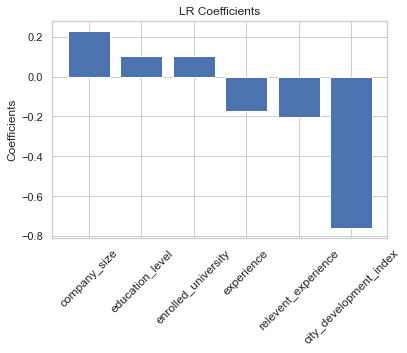

In [67]:
plt.bar(coefficients_six['name_of_features'], coefficients_six['coef'])
plt.xticks(rotation = 45, fontsize = 12)
plt.title('LR Coefficients')
plt.ylabel('Coefficients')
plt.show()

It seems that City Develpoment Index, company size and relevent experience are the major factors responsible for job change.

In [68]:
print(f'Training accuracy of logistic regression using original data is {round(LR_train_acc_org * 100,2)}%')

print(f'Test accuracy of logistic regression using original data is {round(LR_test_acc_org * 100,2)}%')

Training accuracy of logistic regression using original data is 76.65%
Test accuracy of logistic regression using original data is 76.41%


In [69]:
# Classification report and ROC AUC Score for test set
print(classification_report(y_test, LR_org.predict(X_test)))
print(f'ROC AUC Score: {round(roc_auc_score(y_test, LR_org.predict(X_test)),2)}')

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      2877
         1.0       0.56      0.25      0.35       955

    accuracy                           0.76      3832
   macro avg       0.67      0.59      0.60      3832
weighted avg       0.73      0.76      0.73      3832

ROC AUC Score: 0.59


In [70]:
# Store log reg accuracies with original data
train_org.append(LR_train_acc_org)
test_org.append(LR_test_acc_org)

# Store log reg precision and recall of original data
precision_org.append(classification_report(y_test, LR_org.predict(X_test), output_dict = True)['1.0']['precision'])
recall_org.append(classification_report(y_test, LR_org.predict(X_test), output_dict = True)['1.0']['recall'])

In [71]:
### With Upsampled data ###

# 1. Instantiate. using liblinear solver
LR_smote = LogisticRegression(solver = 'liblinear')

# 2. Fit
LR_smote.fit(X_train_smote, y_train_smote)

# 3. Evaluate
LR_train_acc_smote = LR_smote.score(X_train_smote, y_train_smote)
LR_test_acc_smote = LR_smote.score(X_test, y_test)


In [72]:
print(f'Training accuracy of logistic regression using upsampled data is {round(LR_train_acc_smote * 100,2)}%')

print(f'Test accuracy of logistic regression using upsampled data  is {round(LR_test_acc_smote * 100,2)}%')

Training accuracy of logistic regression using upsampled data is 69.32%
Test accuracy of logistic regression using upsampled data  is 70.82%


In [73]:
# Classification report and ROC AUC Score for test set
print(classification_report(y_test, LR_smote.predict(X_test)))
print(f'ROC AUC Score: {round(roc_auc_score(y_test, LR_smote.predict(X_test)),2)}')

              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79      2877
         1.0       0.44      0.63      0.52       955

    accuracy                           0.71      3832
   macro avg       0.65      0.68      0.65      3832
weighted avg       0.75      0.71      0.72      3832

ROC AUC Score: 0.68


In [74]:
# Store log reg accuracies with upsampled data
train_smote.append(LR_train_acc_smote)
test_smote.append(LR_test_acc_smote)

# Store log reg precision and recall of upsampled data
precision_smote.append(classification_report(y_test, LR_smote.predict(X_test), output_dict = True)['1.0']['precision'])
recall_smote.append(classification_report(y_test, LR_smote.predict(X_test), output_dict = True)['1.0']['recall'])

__2. KNN__

In [75]:
### With original data ###

# 1. Instantiate
KNN_org = KNeighborsClassifier()

# 2. Fit
KNN_org.fit(X_train, y_train)

# 3. Evaluate
KNN_train_acc_org = KNN_org.score(X_train, y_train)
KNN_test_acc_org = KNN_org.score(X_test, y_test)

In [76]:
print(f'Training accuracy of KNN using original data is {round(KNN_train_acc_org * 100,2)}%')

print(f'Test accuracy KNN using original data is {round(KNN_test_acc_org * 100,2)}%')


Training accuracy of KNN using original data is 82.06%
Test accuracy KNN using original data is 73.36%


In [77]:
# Classification report and ROC AUC Score
print(classification_report(y_test, KNN_org.predict(X_test)))
print(f'ROC AUC Score: {round(roc_auc_score(y_test, KNN_org.predict(X_test)),2)}')

# note precision and recall curve

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83      2877
         1.0       0.46      0.37      0.41       955

    accuracy                           0.73      3832
   macro avg       0.63      0.61      0.62      3832
weighted avg       0.72      0.73      0.72      3832

ROC AUC Score: 0.61


In [78]:
# Store KNN accuracies with upsampled data
train_org.append(KNN_train_acc_org)
test_org.append(KNN_test_acc_org)

# Store KNN precision and recall of upsampled data
precision_org.append(classification_report(y_test, KNN_org.predict(X_test), output_dict = True)['1.0']['precision'])
recall_org.append(classification_report(y_test, KNN_org.predict(X_test), output_dict = True)['1.0']['recall'])

In [79]:
### With upsampled data ###

# 1. Instantiate
KNN_smote = KNeighborsClassifier()

# 2. Fit
KNN_smote.fit(X_train_smote, y_train_smote)

# 3. Evaluate
KNN_train_acc_smote = KNN_smote.score(X_train_smote, y_train_smote)
KNN_test_acc_smote = KNN_smote.score(X_test, y_test)

In [80]:
print(f'Training accuracy of KNN using upsampled data is {round(KNN_train_acc_smote * 100,2)}%')

print(f'Test accuracy KNN using upsampled data is {round(KNN_test_acc_smote * 100,2)}%')

Training accuracy of KNN using upsampled data is 84.89%
Test accuracy KNN using upsampled data is 65.29%


In [81]:
# Classification report and ROC AUC Score
print(classification_report(y_test, KNN_smote.predict(X_test)))
print(f'ROC AUC Score: {round(roc_auc_score(y_test, KNN_smote.predict(X_test)),2)}')

# note precision and recall curve

              precision    recall  f1-score   support

         0.0       0.85      0.66      0.74      2877
         1.0       0.38      0.64      0.48       955

    accuracy                           0.65      3832
   macro avg       0.62      0.65      0.61      3832
weighted avg       0.73      0.65      0.67      3832

ROC AUC Score: 0.65


In [82]:
# Store KNN accuracies with upsampled data
train_smote.append(KNN_train_acc_smote)
test_smote.append(KNN_test_acc_smote)

# Store log reg precision and recall of upsampled data
precision_smote.append(classification_report(y_test, KNN_smote.predict(X_test), output_dict = True)['1.0']['precision'])
recall_smote.append(classification_report(y_test, KNN_smote.predict(X_test), output_dict = True)['1.0']['recall'])

__3. Random Forest Classifier__

In [83]:
### With original data ###

# 1. Instantiate
RF_org = RandomForestClassifier(max_depth = 4)

# 2. Fit
RF_org.fit(X_train, y_train)

# 3. Evaluate
RF_train_acc_org = RF_org.score(X_train, y_train)
RF_test_acc_org = RF_org.score(X_test, y_test)

print(f'Training accuracy is {round(RF_train_acc_org * 100,2)}%')

print(f'Validation accuracy is {round(RF_test_acc_org * 100,2)}%')

print(classification_report(y_test, RF_org.predict(X_test)))
print(f'ROC AUC Score: {round(roc_auc_score(y_test, RF_org.predict(X_test)),2)}')

Training accuracy is 78.23%
Validation accuracy is 77.06%
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      2877
         1.0       0.58      0.30      0.39       955

    accuracy                           0.77      3832
   macro avg       0.69      0.61      0.62      3832
weighted avg       0.74      0.77      0.74      3832

ROC AUC Score: 0.61


In [84]:
# Store RF accuracies with upsampled data
train_org.append(RF_train_acc_org)
test_org.append(RF_test_acc_org)

# Store RF precision and recall of upsampled data
precision_org.append(classification_report(y_test, RF_org.predict(X_test), output_dict = True)['1.0']['precision'])
recall_org.append(classification_report(y_test, RF_org.predict(X_test), output_dict = True)['1.0']['recall'])

In [85]:
### With upsampled data ###

# 1. Instantiate
RF_smote = RandomForestClassifier(max_depth = 4)

# 2. Fit
RF_smote.fit(X_train_smote, y_train_smote)

# 3. Evaluate
RF_train_acc_smote = RF_smote.score(X_train_smote, y_train_smote)
RF_test_acc_smote = RF_smote.score(X_test, y_test)

print(f'Training accuracy is {round(RF_train_acc_smote * 100,2)}%')

print(f'Validation accuracy is {round(RF_test_acc_smote * 100,2)}%')

print(classification_report(y_test, RF_smote.predict(X_test)))
print(f'ROC AUC Score: {round(roc_auc_score(y_test, RF_smote.predict(X_test)),2)}')

Training accuracy is 74.47%
Validation accuracy is 75.21%
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      2877
         1.0       0.50      0.60      0.55       955

    accuracy                           0.75      3832
   macro avg       0.68      0.70      0.69      3832
weighted avg       0.77      0.75      0.76      3832

ROC AUC Score: 0.7


In [86]:
# Store RF accuracies with upsampled data
train_smote.append(RF_train_acc_smote)
test_smote.append(RF_test_acc_smote)

# Store RF precision and recall of upsampled data
precision_smote.append(classification_report(y_test, RF_smote.predict(X_test), output_dict = True)['1.0']['precision'])
recall_smote.append(classification_report(y_test, RF_smote.predict(X_test), output_dict = True)['1.0']['recall'])

__4. Support Vector Machines__

In [87]:

### With original data ###

# 1. Instantiate
# the default kernel is a Radial Basis Function transformation
SVM_org = SVC(kernel='rbf')

# 2. Fit
SVM_org.fit(X_train, y_train)

# 3. Evaluate
SVM_train_acc_org = SVM_org.score(X_train, y_train)
SVM_test_acc_org = SVM_org.score(X_test, y_test)

In [88]:
print(f'Training accuracy of SVM RBF kernel is {round(SVM_train_acc_org * 100,2)}%')

print(f'Validation accuracy of SVM RBF kernal is {round(SVM_test_acc_org * 100,2)}%')

print(classification_report(y_test, SVM_org.predict(X_test)))
print(f'ROC AUC Score: {round(roc_auc_score(y_test, SVM_org.predict(X_test)),2)}')

Training accuracy of SVM RBF kernel is 78.71%
Validation accuracy of SVM RBF kernal is 77.53%
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      2877
         1.0       0.58      0.37      0.45       955

    accuracy                           0.78      3832
   macro avg       0.69      0.64      0.65      3832
weighted avg       0.75      0.78      0.76      3832

ROC AUC Score: 0.64


In [89]:
# Store SVM accuracies with upsampled data
train_org.append(SVM_train_acc_org)
test_org.append(SVM_test_acc_org)

# Store SVM precision and recall of upsampled data
precision_org.append(classification_report(y_test, SVM_org.predict(X_test), output_dict = True)['1.0']['precision'])
recall_org.append(classification_report(y_test, SVM_org.predict(X_test), output_dict = True)['1.0']['recall'])

In [90]:
### With upsampled data ###

# 1. Instantiate
# the default kernel is a Radial Basis Function transformation
SVM_smote = SVC(kernel = 'rbf')

# 2. Fit
SVM_smote.fit(X_train_smote, y_train_smote)

# 3. Evaluate
SVM_train_acc_smote = SVM_smote.score(X_train_smote, y_train_smote)
SVM_test_acc_smote = SVM_smote.score(X_test, y_test)

In [91]:
print(f'Training accuracy of SVM RBF kernel is {round(SVM_train_acc_smote * 100,2)}%')

print(f'Validation accuracy of SVM RBF kernal is {round(SVM_test_acc_smote * 100,2)}%')

print(classification_report(y_test, SVM_smote.predict(X_test)))
print(f'ROC AUC Score: {round(roc_auc_score(y_test, SVM_smote.predict(X_test)),2)}')

Training accuracy of SVM RBF kernel is 74.47%
Validation accuracy of SVM RBF kernal is 72.49%
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.80      2877
         1.0       0.46      0.63      0.53       955

    accuracy                           0.72      3832
   macro avg       0.66      0.69      0.67      3832
weighted avg       0.76      0.72      0.74      3832

ROC AUC Score: 0.69


In [92]:
# Store SVM accuracies with upsampled data
train_smote.append(SVM_train_acc_smote)
test_smote.append(SVM_test_acc_smote)

# Store SVM precision and recall of upsampled data
precision_smote.append(classification_report(y_test, SVM_smote.predict(X_test), output_dict = True)['1.0']['precision'])
recall_smote.append(classification_report(y_test, SVM_smote.predict(X_test), output_dict = True)['1.0']['recall'])

In [93]:
# Add the resulting list to respective result_df columns
result_df['train_org'] = train_org
result_df['test_org'] = test_org
result_df['train_smote'] = train_smote
result_df['test_smote'] = test_smote
result_df['precision_org'] = precision_org
result_df['recall_org'] = recall_org
result_df['precision_smote'] = precision_smote
result_df['recall_smote'] = recall_smote

In [94]:
result_df

,train_org,test_org,train_smote,test_smote,precision_org,recall_org,precision_smote,recall_smote
LR,0.766475,0.764092,0.693194,0.708246,0.559165,0.252356,0.440467,0.631414
KNN,0.820566,0.733559,0.848879,0.652923,0.457254,0.369634,0.383032,0.642932
RF,0.782265,0.770616,0.744654,0.752088,0.577869,0.295288,0.502207,0.595812
SVM,0.787094,0.775313,0.744654,0.724948,0.577303,0.367539,0.462127,0.632461


In [95]:
# Turn into csv to draw graph on Tableau for easy visibility
result_df.to_csv(r"C:\Users\amanp\OneDrive\Desktop\result_df.csv", index = True)

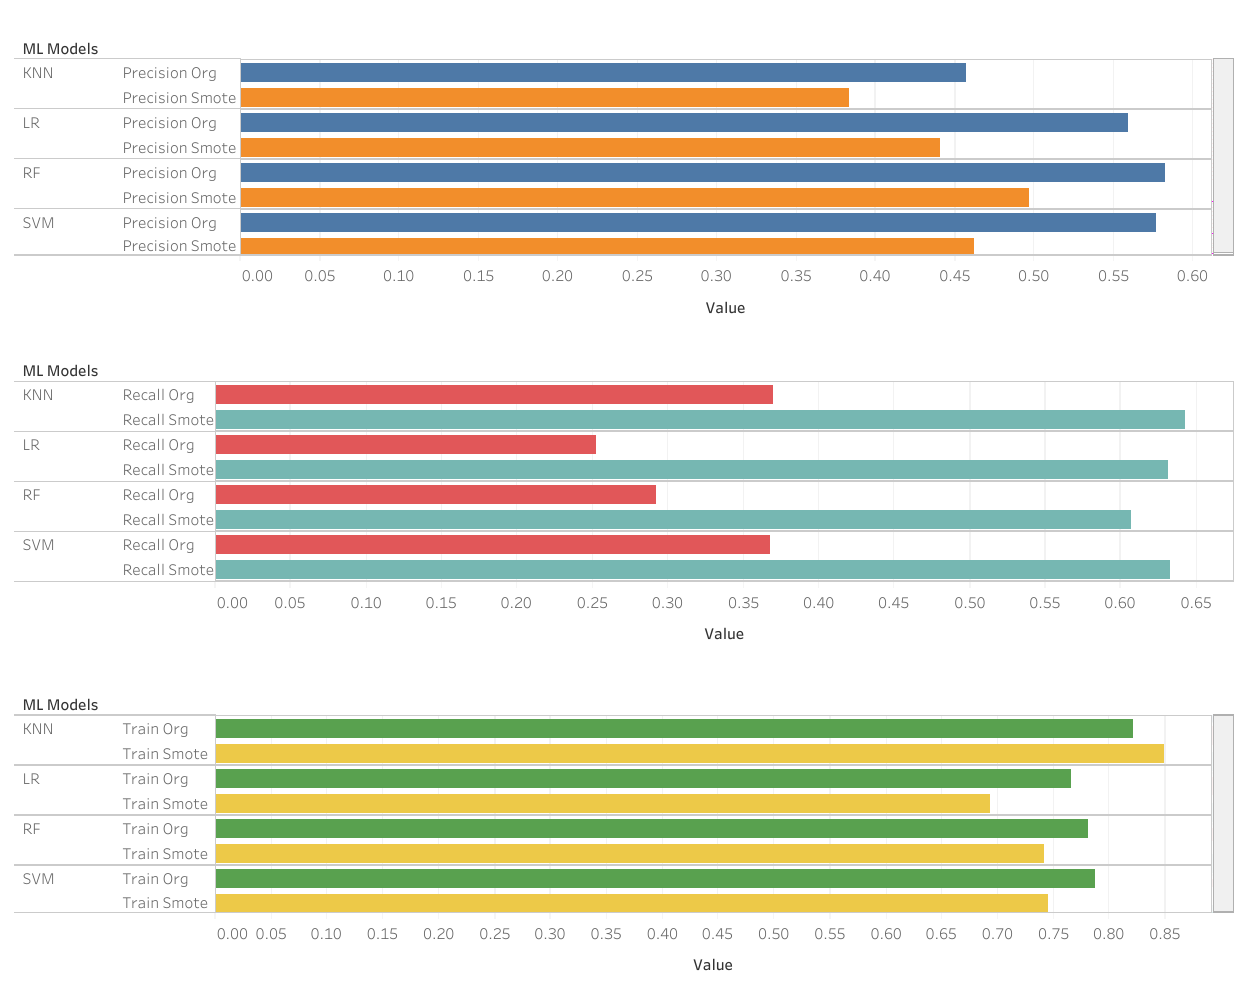

In [96]:
from IPython.display import Image
Image(filename = r"C:\Users\amanp\OneDrive\Desktop\Dashboard 1.png")

__Observations:__

Using Tableau, I generated these three bar graphs with original scores of Recall, Precision and Test Accuracy of different models. There is significant boost in recall score in models with upsampled data whereas tradeoff for boost in recall seem to outperform the drop in precision. I get as big as 35% boost in recall for 12% dropoff in precision. By simply introducing new data in category 1, I am feeding more category 1s for machine learning models to get far more True Positives. As models are picking out True Positives, boost in recall makes sense. 

The accuracy score using KNN performed the best out of all the models used, with accuracy with upsampled data slightly more than with the original data.

### 4. Conclusion and Next Steps:


In this project, the following was accomplished: take data from Kaggle, explore the dataset, preprocess attributes, make and compare various multi-class models. In this case, highly non-linear model KNN seemed to be the best performing.

__next steps__

Next steps will be to submit the models results on the test.csv to the Kaggle website and check the results. If the results don’t look great, one can experiment with different models, different hyperparameters, etc. Furthermore, one can study the input data well, analyze the features and correlations, and explore ways to do feature-extraction and feature-engineering. It often takes steps like these to develop a successful model.